<a href="https://colab.research.google.com/github/phmcasimiro/InLoco_Colab/blob/main/InLoco_Proj_MapasCenso2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAPAS DO CENSO 2010 - DOMICÍLIOS E RENDA POR SETORES CENSITÁRIO**

# **1 - Preparar o Ambiente**

 1.1 Acessar Google Drive pelo Google Colab

In [ ]:
# Autenticando e permitindo acesso à raiz do Google drive com possibilidade de leitura e escrita;
# Autenticando e permitindo acesso ao meu google drive
from google.colab import auth
auth.authenticate_user()
# Para acessar arquivos ou pastas especificos, voce deve usar uma variavel e apontar o caminho do drive

### 1.2 Instalar pacotes e bibliotecas do projeto

Em regra utilizamos "!pip install xxx" para instalar bibliotecas no Google Colab;

Utilizamos "-q" para não exibir toda a instalação de um biblioteca, mas você pode retirar o "-q" na primeira vez para ver como são instaladas as bibliotecas no Google Colab;

No 2° bloco de código abaixo importamos as bibliotecas que serão utilizadas no projeto, mas outras poderão ser adicionadas ao longo do código;

In [ ]:
# Instalando a Geopandas sem mostrar os updates da bilioteca
!pip install geopandas -q
# Pacote tqdm para monitorar o progresso de uma operacao
!pip install tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 71.8 MB/s eta 0:00:00


In [ ]:
# Importar pandas
import pandas as pd
# importando a geopandas
import geopandas as gpd
# Biblioteca para plotar/projetar/visualizar geometrias/mapas
import matplotlib.pyplot as plt
# importar um módulo específico da matplotlib
from matplotlib import legend
# Importar objeto CRS da biblioteca pyproj
from pyproj import CRS
# Biblioteca de geometrias
from shapely.geometry import Point, LineString, Polygon
# Pacote tqdm para monitorar o progresso de uma operacao
from tqdm import tqdm
# para manipular caminhos, pastas diretorios, arquivos, etc
import os
# importar a biblioteca Numpy para calcular campos
import numpy as np

## **2 - Acessar arquivos e construir os DataFrames e GeoDataFrames**

### 2.1 Acessar, Carregar e Exibir o arquivo .csv com informações de Domicílios e Renda do CENSO 2010 como um Pandas DataFrame

In [ ]:
# Criar a variável "df_domic_renda_2010" para armazenar o Pandas DataFrame a partir do método "pd.read_csv()" que lê o arquivo .csv armazenado no Google Drive
# O caminho do Google Drive para leitura do arquivo .csv deve ser passado
df_domic_renda_2010 = pd.read_csv(r'/content/drive/MyDrive/09_DATASETS/IBGE_Dados/censo2010/setor_censitario_domicilio_renda_2010.csv')

# Exibir o dataframe armazenado na variável "df_domic_renda_2010"
display(df_domic_renda_2010)

,id_setor_censitario,sigla_uf,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,v011,v012,v013,v014
0,120020305000066,AC,0.0,932571.0,932571.0,0.0,10.0,29.0,54.0,82.0,94.0,48.0,26.0,7.0,5.0,2.0
1,120025205000006,AC,13.0,1094784.0,1066144.0,28640.0,10.0,36.0,109.0,128.0,108.0,40.0,33.0,18.0,8.0,11.0
2,120040105000025,AC,4.0,1105890.0,1097580.0,8310.0,0.0,6.0,10.0,43.0,61.0,42.0,49.0,29.0,9.0,0.0
3,120040105000027,AC,0.0,1677555.0,1677555.0,0.0,0.0,3.0,13.0,50.0,76.0,61.0,61.0,42.0,18.0,4.0
4,120040105000028,AC,0.0,1370491.0,1370491.0,0.0,3.0,15.0,37.0,70.0,86.0,57.0,46.0,24.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310115,355700605000117,SP2,0.0,1643834.0,1643834.0,0.0,0.0,2.0,21.0,71.0,97.0,39.0,39.0,31.0,17.0,2.0
310116,355710505000020,SP2,0.0,771355.0,771355.0,0.0,0.0,4.0,21.0,108.0,108.0,39.0,24.0,23.0,3.0,29.0
310117,355710505000028,SP2,0.0,875677.0,875677.0,0.0,3.0,9.0,49.0,122.0,145.0,39.0,34.0,12.0,1.0,5.0
310118,355710505000045,SP2,0.0,832783.0,832783.0,0.0,0.0,0.0,4.0,52.0,73.0,39.0,37.0,16.0,6.0,2.0


In [ ]:
 # Verifica o tipo de dados de todas as colunas/atributos do DataFrame
print(df_domic_renda_2010.dtypes)
# importante notar que o atributo/coluna "id_setor_censitario" é um int64

id_setor_censitario      int64
sigla_uf                object
v001                   float64
v002                   float64
v003                   float64
v004                   float64
v005                   float64
v006                   float64
v007                   float64
v008                   float64
v009                   float64
v010                   float64
v011                   float64
v012                   float64
v013                   float64
v014                   float64
dtype: object


### 2.2 Acessar, Carregar e Exibir o arquivo .shp com informações de Setores Censitários do CENSO 2010 como um Geopandas GeoDataFrame

Exibir como GeoDataFrame (tabela) e Plotar (desenhar) em um Mapa

In [ ]:
# Criar a variável "shp_br_setores" para armazenar os dados do arquivo .shp armazenado no Google Drive
# O caminho do Google Drive para leitura do arquivo .shp deve ser passado
shp_rj_setores =  '/content/drive/MyDrive/09_DATASETS/IBGE_Dados/UFs_SetoresCensitarios/CENSO2010/RJ_33/33SEE250GC_SIR.shp'

# Verificar o tipo de dados da variável "shp_rj_setores"
print(type(shp_rj_setores))
# Importante notar que a variável é uma class "string" e não um GeoDataFrame

<class 'str'>


In [ ]:
# Criar um GeoDataFrame com a variável "rj_setores" a partir do arquivo .shp que está armazenado na variável "shp_rj_setores"
rj_setores = gpd.read_file(shp_rj_setores)

# Exibir uma mensagem com o tipo de dados da variável "rj_setores", ou seja, agora temos um GeoDataFrame
print('O tipo de arquivo é: %s' %(type(rj_setores)))

O tipo de arquivo é: <class 'geopandas.geodataframe.GeoDataFrame'>


In [ ]:
 # Verificar o tipo de dados de todas as colunas do GeoDataFrame
print(rj_setores.dtypes)
# Importante notar que o atributo/coluna "CD_GEOCODI" é um object
#Portanto, será necessário transformá-lo para realizar um Join com o atributo "id_setor_censitario" do DataFrame "df_domic_renda_2010"

ID               int64
CD_GEOCODI      object
TIPO            object
CD_GEOCODB      object
NM_BAIRRO       object
CD_GEOCODS      object
NM_SUBDIST      object
CD_GEOCODD      object
NM_DISTRIT      object
CD_GEOCODM      object
NM_MUNICIP      object
NM_MICRO        object
NM_MESO         object
geometry      geometry
dtype: object


In [ ]:
# Exibir os primeiros registros do GeoDataFrame
display(rj_setores.head())

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
0,43773,330025805000046,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,ARRAIAL DO CABO,LAGOS,BAIXADAS,"POLYGON ((-42.01954 -22.96936, -42.02059 -22.9..."
1,43774,330025805000047,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,ARRAIAL DO CABO,LAGOS,BAIXADAS,"POLYGON ((-42.02282 -22.96769, -42.02290 -22.9..."
2,43775,330025805000048,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,ARRAIAL DO CABO,LAGOS,BAIXADAS,"POLYGON ((-42.16022 -22.94740, -42.16241 -22.9..."
3,43776,330025805000049,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,ARRAIAL DO CABO,LAGOS,BAIXADAS,"POLYGON ((-42.17397 -22.94625, -42.17588 -22.9..."
4,43777,330025805000050,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,ARRAIAL DO CABO,LAGOS,BAIXADAS,"POLYGON ((-42.17588 -22.94609, -42.17848 -22.9..."


<AxesSubplot:>

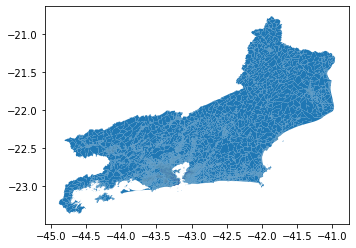

In [ ]:
# Usando a bibliteca matplotlib, fazer uma plotagem simples do GeoDataFrame para visualizar a geometria dos dados geográficos
rj_setores.plot()

## **3 - Preparar o DataFrame "Domicílios e Renda 2010" com Filtros e campos calculados**

Lista de Passos

1. Exibir o DataFrame "df_domic_renda_2010" e o GeoDataFrame "rj_setores"
2. Fazer um Filtro do DataFrame "df_domic_renda_2010" para conter informações apenas dos Setores Censitários da UF RJ "df_domic_renda_2010_RJ33"
3. Criar um atributo "ID" serial não nulo no DataFrame "df_domic_renda_2010_RJ33"
4. Reorganizar os atributos do DataFrame "df_domic_renda_2010_RJ33"
5. Redefinir os tipos de dados dos atributos que serão utilizads no Join, ou seja, definir como "int" o atributo "id_setores_censitarios" do DataFrame "df_domic_renda_2010_RJ33" e definir como "int" o atributo "CD_GEOCDI" do DataFrame "rj_setores"



### **Exibir o DataFrame "df_domic_renda_2010" e o GeoDataFrame "rj_setores"**

In [ ]:
# Exibir o DataFrame Domicílios e Renda 2010
display(df_domic_renda_2010)

,id_setor_censitario,sigla_uf,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,v011,v012,v013,v014
0,120020305000066,AC,0.0,932571.0,932571.0,0.0,10.0,29.0,54.0,82.0,94.0,48.0,26.0,7.0,5.0,2.0
1,120025205000006,AC,13.0,1094784.0,1066144.0,28640.0,10.0,36.0,109.0,128.0,108.0,40.0,33.0,18.0,8.0,11.0
2,120040105000025,AC,4.0,1105890.0,1097580.0,8310.0,0.0,6.0,10.0,43.0,61.0,42.0,49.0,29.0,9.0,0.0
3,120040105000027,AC,0.0,1677555.0,1677555.0,0.0,0.0,3.0,13.0,50.0,76.0,61.0,61.0,42.0,18.0,4.0
4,120040105000028,AC,0.0,1370491.0,1370491.0,0.0,3.0,15.0,37.0,70.0,86.0,57.0,46.0,24.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310115,355700605000117,SP2,0.0,1643834.0,1643834.0,0.0,0.0,2.0,21.0,71.0,97.0,39.0,39.0,31.0,17.0,2.0
310116,355710505000020,SP2,0.0,771355.0,771355.0,0.0,0.0,4.0,21.0,108.0,108.0,39.0,24.0,23.0,3.0,29.0
310117,355710505000028,SP2,0.0,875677.0,875677.0,0.0,3.0,9.0,49.0,122.0,145.0,39.0,34.0,12.0,1.0,5.0
310118,355710505000045,SP2,0.0,832783.0,832783.0,0.0,0.0,0.0,4.0,52.0,73.0,39.0,37.0,16.0,6.0,2.0


### **Fazer um Filtro do DataFrame "df_domic_renda_2010" para conter informações apenas dos Setores Censitários da UF RJ "df_domic_renda_2010_RJ33"**

In [ ]:
# Fazer um Filtro para Setores Censitários da UF "RJ"
# Perceba que foi criada uma nova variável "df_domic_renda_2010_RJ33" que recebe o DataFrame anterior com o seguinte filtro de atributos:
# Selecionar em "df_domic_renda_2010" os registros em que o atributo/coluna "sigla_uf" tiver o valor "RJ"
df_domic_renda_2010_RJ33 = df_domic_renda_2010[df_domic_renda_2010['sigla_uf']=='RJ']

# Exibir o novo DataFrame que contém apenas Setores Censitários do RJ
# Este será o DataFrame que será utilizado para o Join com as geometrias dos setores censitários
display(df_domic_renda_2010_RJ33)

,id_setor_censitario,sigla_uf,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,v011,v012,v013,v014
9273,330010005000003,RJ,0.0,1513128.0,1513128.0,0.0,0.0,1.0,7.0,45.0,106.0,65.0,57.0,43.0,17.0,2.0
9274,330010005000009,RJ,0.0,799224.0,799224.0,0.0,0.0,3.0,10.0,33.0,78.0,48.0,39.0,23.0,7.0,9.0
9275,330010005000022,RJ,0.0,1527022.0,1527022.0,0.0,1.0,5.0,11.0,50.0,75.0,46.0,66.0,46.0,25.0,22.0
9276,330010005000023,RJ,0.0,2371904.0,2371904.0,0.0,0.0,4.0,6.0,21.0,30.0,95.0,120.0,119.0,35.0,28.0
9277,330010005000028,RJ,0.0,675188.0,675188.0,0.0,8.0,23.0,74.0,150.0,131.0,40.0,3.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309387,330580205000049,RJ,0.0,770738.0,770738.0,0.0,1.0,10.0,41.0,112.0,117.0,39.0,34.0,6.0,2.0,18.0
309388,330600805000013,RJ,0.0,679404.0,679404.0,0.0,2.0,4.0,22.0,61.0,100.0,39.0,31.0,8.0,1.0,2.0
309389,330600805000101,RJ,0.0,706452.0,706452.0,0.0,1.0,1.0,5.0,28.0,70.0,39.0,40.0,20.0,8.0,3.0
309390,330620605000008,RJ,0.0,674606.0,674606.0,0.0,1.0,15.0,29.0,71.0,65.0,39.0,21.0,22.0,5.0,33.0


### **Criar um atributo "ID" serial não nulo no DataFrame "df_domic_renda_2010_RJ33"**

In [ ]:
# Criar um atributo "ID" e criar um .index serial não nulo
df_domic_renda_2010_RJ33['ID'] = df_domic_renda_2010_RJ33.index
display(df_domic_renda_2010_RJ33)

<ipython-input-13-e30d063f30e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_domic_renda_2010_RJ33['ID'] = df_domic_renda_2010_RJ33.index


,id_setor_censitario,sigla_uf,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,v011,v012,v013,v014,ID
9273,330010005000003,RJ,0.0,1513128.0,1513128.0,0.0,0.0,1.0,7.0,45.0,106.0,65.0,57.0,43.0,17.0,2.0,9273
9274,330010005000009,RJ,0.0,799224.0,799224.0,0.0,0.0,3.0,10.0,33.0,78.0,48.0,39.0,23.0,7.0,9.0,9274
9275,330010005000022,RJ,0.0,1527022.0,1527022.0,0.0,1.0,5.0,11.0,50.0,75.0,46.0,66.0,46.0,25.0,22.0,9275
9276,330010005000023,RJ,0.0,2371904.0,2371904.0,0.0,0.0,4.0,6.0,21.0,30.0,95.0,120.0,119.0,35.0,28.0,9276
9277,330010005000028,RJ,0.0,675188.0,675188.0,0.0,8.0,23.0,74.0,150.0,131.0,40.0,3.0,1.0,0.0,5.0,9277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309387,330580205000049,RJ,0.0,770738.0,770738.0,0.0,1.0,10.0,41.0,112.0,117.0,39.0,34.0,6.0,2.0,18.0,309387
309388,330600805000013,RJ,0.0,679404.0,679404.0,0.0,2.0,4.0,22.0,61.0,100.0,39.0,31.0,8.0,1.0,2.0,309388
309389,330600805000101,RJ,0.0,706452.0,706452.0,0.0,1.0,1.0,5.0,28.0,70.0,39.0,40.0,20.0,8.0,3.0,309389
309390,330620605000008,RJ,0.0,674606.0,674606.0,0.0,1.0,15.0,29.0,71.0,65.0,39.0,21.0,22.0,5.0,33.0,309390


In [ ]:
 # Verifica o tipo de dados de todas as colunas
print(df_domic_renda_2010_RJ33.dtypes)
# note que temos 2 atributos/colunas como int64 
# Assim podemos transformar o atributo "id_setor_censitario" no tipo object para ficar igual ao atributo "CD_GEOCODI" da geometria de setores censitários
# Quandos os 2 atributos estiverem com o mesmo tipo de dados object, então poderemos fazer o Join das tabelas

id_setor_censitario      int64
sigla_uf                object
v001                   float64
v002                   float64
v003                   float64
v004                   float64
v005                   float64
v006                   float64
v007                   float64
v008                   float64
v009                   float64
v010                   float64
v011                   float64
v012                   float64
v013                   float64
v014                   float64
ID                       int64
dtype: object


### **Reorganizar os atributos do DataFrame "df_domic_renda_2010_RJ33"**

In [ ]:
# Reorganizar os atributos/colunas
df_domic_renda_2010_RJ33 = df_domic_renda_2010_RJ33[['ID', 'id_setor_censitario', 'sigla_uf', 'v001', 'v002', 'v003', 'v004', 'v005', 'v006', 'v007', 'v008', 'v009', 'v010', 'v011', 'v012', 'v013', 'v014']]
 # Verifica o tipo de dados de todas as colunas
print(df_domic_renda_2010_RJ33.dtypes)

ID                       int64
id_setor_censitario      int64
sigla_uf                object
v001                   float64
v002                   float64
v003                   float64
v004                   float64
v005                   float64
v006                   float64
v007                   float64
v008                   float64
v009                   float64
v010                   float64
v011                   float64
v012                   float64
v013                   float64
v014                   float64
dtype: object


### **Redefinir os tipos de dados dos atributos que serão utilizads no Join, ou seja, definir como "int" o atributo "id_setores_censitarios" do DataFrame "df_domic_renda_2010_RJ33" e definir como "int" o atributo "CD_GEOCDI" do DataFrame "rj_setores"**

In [ ]:
# Conversão de tipos de dado ".dtype()" das colunas/atributos
# A coluna id_setor_censitario é do tipo int64 e precisa se tornar int

# Criar o DataFrame "cd_geocodi1" com apenas 1 coluna e n linhas com os dados da coluna "id_setor_censitario" do DataFrame "df_domic_renda_2010_RJ33"
cd_geocodi1 = df_domic_renda_2010_RJ33['id_setor_censitario']
# Atribuir à coluna "id_setor_censitario" do DataFrame "df_domic_renda_2010_RJ33" o novo DataFrame "cd_geocodi1" como tipo objetc ".astype(int)"
df_domic_renda_2010_RJ33['id_setor_censitario']=cd_geocodi1.astype(int)

# Verifica o tipo de dados de todas as colunas
print(df_domic_renda_2010_RJ33.dtypes)

ID                       int64
id_setor_censitario      int64
sigla_uf                object
v001                   float64
v002                   float64
v003                   float64
v004                   float64
v005                   float64
v006                   float64
v007                   float64
v008                   float64
v009                   float64
v010                   float64
v011                   float64
v012                   float64
v013                   float64
v014                   float64
dtype: object


In [ ]:
# Exibir o DataFrame
display(df_domic_renda_2010_RJ33)

,ID,id_setor_censitario,sigla_uf,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,v011,v012,v013,v014
9273,9273,330010005000003,RJ,0.0,1513128.0,1513128.0,0.0,0.0,1.0,7.0,45.0,106.0,65.0,57.0,43.0,17.0,2.0
9274,9274,330010005000009,RJ,0.0,799224.0,799224.0,0.0,0.0,3.0,10.0,33.0,78.0,48.0,39.0,23.0,7.0,9.0
9275,9275,330010005000022,RJ,0.0,1527022.0,1527022.0,0.0,1.0,5.0,11.0,50.0,75.0,46.0,66.0,46.0,25.0,22.0
9276,9276,330010005000023,RJ,0.0,2371904.0,2371904.0,0.0,0.0,4.0,6.0,21.0,30.0,95.0,120.0,119.0,35.0,28.0
9277,9277,330010005000028,RJ,0.0,675188.0,675188.0,0.0,8.0,23.0,74.0,150.0,131.0,40.0,3.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309387,309387,330580205000049,RJ,0.0,770738.0,770738.0,0.0,1.0,10.0,41.0,112.0,117.0,39.0,34.0,6.0,2.0,18.0
309388,309388,330600805000013,RJ,0.0,679404.0,679404.0,0.0,2.0,4.0,22.0,61.0,100.0,39.0,31.0,8.0,1.0,2.0
309389,309389,330600805000101,RJ,0.0,706452.0,706452.0,0.0,1.0,1.0,5.0,28.0,70.0,39.0,40.0,20.0,8.0,3.0
309390,309390,330620605000008,RJ,0.0,674606.0,674606.0,0.0,1.0,15.0,29.0,71.0,65.0,39.0,21.0,22.0,5.0,33.0


In [ ]:
# Conversão de tipos de dado ".dtype()" das colunas/atributos
# A coluna CD_GEOCODI é do tipo int64 e precisa se tornar int

# Criar o DataFrame "cd_geocodi2" com apenas 1 coluna e n linhas com os dados da coluna "id_setor_censitario" do DataFrame "df_domic_renda_2010_RJ33"
cd_geocodi2 = rj_setores['CD_GEOCODI']
# Atribuir à coluna "id_setor_censitario" do DataFrame "df_domic_renda_2010_RJ33" o novo DataFrame "cd_geocodi2" como tipo objetc ".astype(int)"
rj_setores['CD_GEOCODI']=cd_geocodi2.astype(int)

# Verifica o tipo de dados de todas as colunas
print(rj_setores.dtypes)

ID               int64
CD_GEOCODI       int64
TIPO            object
CD_GEOCODB      object
NM_BAIRRO       object
CD_GEOCODS      object
NM_SUBDIST      object
CD_GEOCODD      object
NM_DISTRIT      object
CD_GEOCODM      object
NM_MUNICIP      object
NM_MICRO        object
NM_MESO         object
geometry      geometry
dtype: object


In [ ]:
# Exibir o GeoDataFrame
display(rj_setores)

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
0,43773,330025805000046,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,ARRAIAL DO CABO,LAGOS,BAIXADAS,"POLYGON ((-42.01954 -22.96936, -42.02059 -22.9..."
1,43774,330025805000047,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,ARRAIAL DO CABO,LAGOS,BAIXADAS,"POLYGON ((-42.02282 -22.96769, -42.02290 -22.9..."
2,43775,330025805000048,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,ARRAIAL DO CABO,LAGOS,BAIXADAS,"POLYGON ((-42.16022 -22.94740, -42.16241 -22.9..."
3,43776,330025805000049,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,ARRAIAL DO CABO,LAGOS,BAIXADAS,"POLYGON ((-42.17397 -22.94625, -42.17588 -22.9..."
4,43777,330025805000050,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,ARRAIAL DO CABO,LAGOS,BAIXADAS,"POLYGON ((-42.17588 -22.94609, -42.17848 -22.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28313,72057,330630505000488,URBANO,330630505045,Três Poços,33063050500,NaN,330630505,VOLTA REDONDA,3306305,VOLTA REDONDA,VALE DO PARAÍBA FLUMINENSE,SUL FLUMINENSE,"POLYGON ((-44.03993 -22.49914, -44.04028 -22.4..."
28314,72058,330630505000489,URBANO,NaN,NaN,33063050500,NaN,330630505,VOLTA REDONDA,3306305,VOLTA REDONDA,VALE DO PARAÍBA FLUMINENSE,SUL FLUMINENSE,"POLYGON ((-44.08332 -22.61036, -44.08420 -22.6..."
28315,72059,330630505000490,URBANO,NaN,NaN,33063050500,NaN,330630505,VOLTA REDONDA,3306305,VOLTA REDONDA,VALE DO PARAÍBA FLUMINENSE,SUL FLUMINENSE,"POLYGON ((-44.08155 -22.60923, -44.08150 -22.6..."
28316,72060,330630505000491,URBANO,330630505041,Vila Brasília,33063050500,NaN,330630505,VOLTA REDONDA,3306305,VOLTA REDONDA,VALE DO PARAÍBA FLUMINENSE,SUL FLUMINENSE,"POLYGON ((-44.11933 -22.48886, -44.11992 -22.4..."


## **4 - Join/União de Tabelas**
Junção de Tabelas/Table Join: A funcao "merge()" utiliza um atributo Primary Key (PK) da tabela principal e um atributo Foreign Key (FK) da tabela acessoria. 

*pd.merge()*
https://geopandas.org/en/stable/docs/user_guide/mergingdata.html)

Vamos unir o DataFrame "df_domic_renda_2010_RJ33" ao GeoDataFrame "br_setores" por meio da PK "CD_GEOCODI" e FK "id_setores_censitarios"**negrito**

In [ ]:
# Criar um novo GeoDataFrame usando "pd.merge()" para combinar o GeoDataFrame "rj_setores" com o DataFrame "df_domic_renda_2010_RJ33" utilizando PK "CD_GEOCODI" e FK "id_setor_censitario"
merge = rj_setores.merge(df_domic_renda_2010_RJ33, left_on='CD_GEOCODI', right_on='id_setor_censitario')
display(merge)

,ID_x,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,...,v005,v006,v007,v008,v009,v010,v011,v012,v013,v014
0,43773,330025805000046,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,...,0.0,2.0,12.0,22.0,26.0,14.0,5.0,8.0,1.0,4.0
1,43774,330025805000047,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,...,1.0,5.0,9.0,30.0,18.0,4.0,1.0,3.0,0.0,1.0
2,43775,330025805000048,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,...,0.0,5.0,7.0,10.0,12.0,3.0,1.0,0.0,0.0,6.0
3,43776,330025805000049,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,...,1.0,4.0,4.0,11.0,9.0,0.0,1.0,5.0,1.0,2.0
4,43777,330025805000050,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,...,1.0,0.0,13.0,9.0,13.0,6.0,3.0,4.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27764,72057,330630505000488,URBANO,330630505045,Três Poços,33063050500,NaN,330630505,VOLTA REDONDA,3306305,...,1.0,8.0,39.0,69.0,57.0,4.0,0.0,1.0,0.0,0.0
27765,72058,330630505000489,URBANO,NaN,NaN,33063050500,NaN,330630505,VOLTA REDONDA,3306305,...,1.0,8.0,15.0,20.0,4.0,2.0,1.0,1.0,0.0,1.0
27766,72059,330630505000490,URBANO,NaN,NaN,33063050500,NaN,330630505,VOLTA REDONDA,3306305,...,4.0,37.0,113.0,162.0,90.0,8.0,3.0,1.0,1.0,3.0
27767,72060,330630505000491,URBANO,330630505041,Vila Brasília,33063050500,NaN,330630505,VOLTA REDONDA,3306305,...,24.0,45.0,106.0,121.0,72.0,7.0,2.0,0.0,0.0,19.0


In [ ]:
print(merge.dtypes)

ID_x                      int64
CD_GEOCODI                int64
TIPO                     object
CD_GEOCODB               object
NM_BAIRRO                object
CD_GEOCODS               object
NM_SUBDIST               object
CD_GEOCODD               object
NM_DISTRIT               object
CD_GEOCODM               object
NM_MUNICIP               object
NM_MICRO                 object
NM_MESO                  object
geometry               geometry
ID_y                      int64
id_setor_censitario       int64
sigla_uf                 object
v001                    float64
v002                    float64
v003                    float64
v004                    float64
v005                    float64
v006                    float64
v007                    float64
v008                    float64
v009                    float64
v010                    float64
v011                    float64
v012                    float64
v013                    float64
v014                    float64
dtype: o

In [ ]:
# Criar uma nova variável com nome intuitivo para trabalhar na fase de plotagem
rj_setores_domic_renda_2010 = merge
rj_setores_domic_renda_2010

,ID_x,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,...,v005,v006,v007,v008,v009,v010,v011,v012,v013,v014
0,43773,330025805000046,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,...,0.0,2.0,12.0,22.0,26.0,14.0,5.0,8.0,1.0,4.0
1,43774,330025805000047,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,...,1.0,5.0,9.0,30.0,18.0,4.0,1.0,3.0,0.0,1.0
2,43775,330025805000048,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,...,0.0,5.0,7.0,10.0,12.0,3.0,1.0,0.0,0.0,6.0
3,43776,330025805000049,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,...,1.0,4.0,4.0,11.0,9.0,0.0,1.0,5.0,1.0,2.0
4,43777,330025805000050,URBANO,NaN,NaN,33002580500,NaN,330025805,ARRAIAL DO CABO,3300258,...,1.0,0.0,13.0,9.0,13.0,6.0,3.0,4.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27764,72057,330630505000488,URBANO,330630505045,Três Poços,33063050500,NaN,330630505,VOLTA REDONDA,3306305,...,1.0,8.0,39.0,69.0,57.0,4.0,0.0,1.0,0.0,0.0
27765,72058,330630505000489,URBANO,NaN,NaN,33063050500,NaN,330630505,VOLTA REDONDA,3306305,...,1.0,8.0,15.0,20.0,4.0,2.0,1.0,1.0,0.0,1.0
27766,72059,330630505000490,URBANO,NaN,NaN,33063050500,NaN,330630505,VOLTA REDONDA,3306305,...,4.0,37.0,113.0,162.0,90.0,8.0,3.0,1.0,1.0,3.0
27767,72060,330630505000491,URBANO,330630505041,Vila Brasília,33063050500,NaN,330630505,VOLTA REDONDA,3306305,...,24.0,45.0,106.0,121.0,72.0,7.0,2.0,0.0,0.0,19.0


In [ ]:
# Reorganizar os atributos/colunas
rj_setores_domic_renda_2010 = rj_setores_domic_renda_2010[[
'ID_x',
'ID_y',
'CD_GEOCODI',
'TIPO',
'CD_GEOCODB',
'NM_BAIRRO',
'CD_GEOCODS',
'NM_SUBDIST',
'CD_GEOCODD',
'NM_DISTRIT',
'CD_GEOCODM',
'NM_MUNICIP',
'NM_MICRO',
'NM_MESO',
'id_setor_censitario',
'sigla_uf',
'v001',
'v002',
'v003',
'v004',
'v005',
'v006',
'v007',
'v008',
'v009',
'v010',
'v011',
'v012',
'v013',
'v014',
'geometry'
    ]]
 # Verifica o tipo de dados de todas as colunas
print(rj_setores_domic_renda_2010.dtypes)

ID_x                      int64
ID_y                      int64
CD_GEOCODI                int64
TIPO                     object
CD_GEOCODB               object
NM_BAIRRO                object
CD_GEOCODS               object
NM_SUBDIST               object
CD_GEOCODD               object
NM_DISTRIT               object
CD_GEOCODM               object
NM_MUNICIP               object
NM_MICRO                 object
NM_MESO                  object
id_setor_censitario       int64
sigla_uf                 object
v001                    float64
v002                    float64
v003                    float64
v004                    float64
v005                    float64
v006                    float64
v007                    float64
v008                    float64
v009                    float64
v010                    float64
v011                    float64
v012                    float64
v013                    float64
v014                    float64
geometry               geometry
dtype: o

In [ ]:
# Renomear colunas específicas
rj_setores_domic_renda_2010.rename(columns={"ID_x": "id", "ID_y": "id2"}, inplace = True)
print(rj_setores_domic_renda_2010.dtypes)

id                        int64
id2                       int64
CD_GEOCODI                int64
TIPO                     object
CD_GEOCODB               object
NM_BAIRRO                object
CD_GEOCODS               object
NM_SUBDIST               object
CD_GEOCODD               object
NM_DISTRIT               object
CD_GEOCODM               object
NM_MUNICIP               object
NM_MICRO                 object
NM_MESO                  object
id_setor_censitario       int64
sigla_uf                 object
v001                    float64
v002                    float64
v003                    float64
v004                    float64
v005                    float64
v006                    float64
v007                    float64
v008                    float64
v009                    float64
v010                    float64
v011                    float64
v012                    float64
v013                    float64
v014                    float64
geometry               geometry
dtype: o

## **5 - Mapear o GeoDataFrame**

### **5.1 - Mapa dos Setores Censitários do RJ**

(array([-23.5, -23. , -22.5, -22. , -21.5, -21. , -20.5]),
 [Text(0, -23.5, '−23.5'),
  Text(0, -23.0, '−23.0'),
  Text(0, -22.5, '−22.5'),
  Text(0, -22.0, '−22.0'),
  Text(0, -21.5, '−21.5'),
  Text(0, -21.0, '−21.0'),
  Text(0, -20.5, '−20.5')])

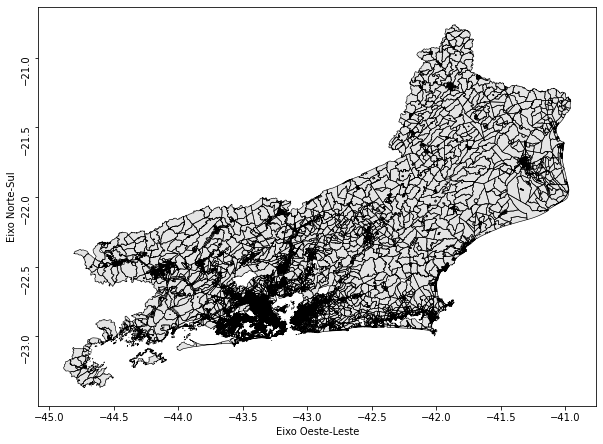

In [ ]:
# Trecho de codigo para criar figura, criar os eixos para plotagem, definir o tamanho da figura como 10 x 10 polegadas
fig, eixo = plt.subplots(figsize = (10,10))

#Plotar os polígonos dos setores censitários
rj_setores_domic_renda_2010.plot(ax=eixo, color='lightgrey', alpha=0.6)
# Plote apenas os limites dos polígonos dos municípios
rj_setores_domic_renda_2010.boundary.plot(ax=eixo, color='black',linewidth=0.6)

# Nomear os eixos X e Y
eixo.set_ylabel('Eixo Norte-Sul') # Configurar o label do eixo y
eixo.set_xlabel('Eixo Oeste-Leste') # Configurar o label do eixo X

# Remover a notação científica dos eixos e colocar números inteiros
eixo.ticklabel_format(style='plain')

# Rotacionar os rótulos numéricos do eixo Y
plt.yticks(rotation=90)

(array([-23.5, -23. , -22.5, -22. , -21.5, -21. , -20.5]),
 [Text(0, -23.5, '−23.5'),
  Text(0, -23.0, '−23.0'),
  Text(0, -22.5, '−22.5'),
  Text(0, -22.0, '−22.0'),
  Text(0, -21.5, '−21.5'),
  Text(0, -21.0, '−21.0'),
  Text(0, -20.5, '−20.5')])

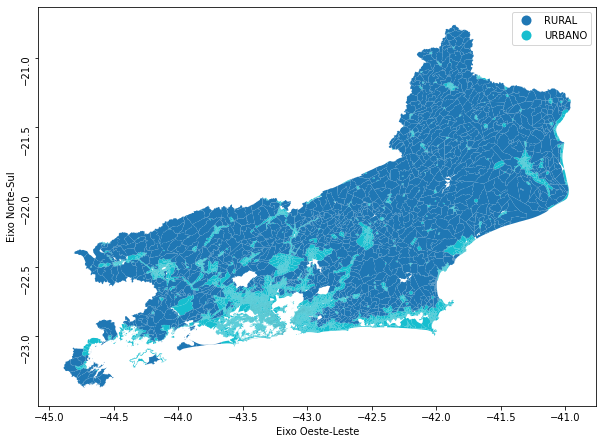

In [ ]:
# Trecho de codigo para criar figura, criar os eixos para plotagem, definir o tamanho da figura como 10 x 10 polegadas
fig, eixo = plt.subplots(figsize = (10,10))

# Plotar os setores censitários classificados com o Tipo do Setor Censitário (Urbano/Rural) com legenda
rj_setores_domic_renda_2010.plot(column='TIPO', ax=eixo,legend=True)

# Nomear os eixos X e Y
eixo.set_ylabel('Eixo Norte-Sul') # Configurar o label do eixo y
eixo.set_xlabel('Eixo Oeste-Leste') # Configurar o label do eixo X

# Remover a notação científica dos eixos e colocar números inteiros
eixo.ticklabel_format(style='plain')

# Rotacionar os rótulos numéricos do eixo Y
plt.yticks(rotation=90)

(array([-23.5, -23. , -22.5, -22. , -21.5, -21. , -20.5]),
 [Text(0, -23.5, '−23.5'),
  Text(0, -23.0, '−23.0'),
  Text(0, -22.5, '−22.5'),
  Text(0, -22.0, '−22.0'),
  Text(0, -21.5, '−21.5'),
  Text(0, -21.0, '−21.0'),
  Text(0, -20.5, '−20.5')])

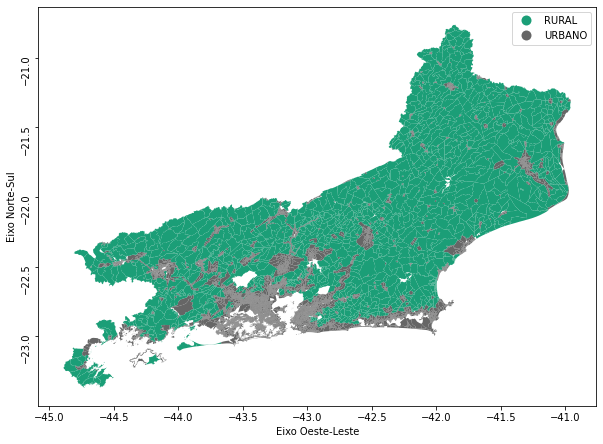

In [ ]:
# Trecho de codigo para criar figura, criar os eixos para plotagem, definir o tamanho da figura como 10 x 10 polegadas
fig, eixo = plt.subplots(figsize = (10,10))
# Plote cada registro/linha com uma cor diferente
rj_setores_domic_renda_2010.plot(column='TIPO',cmap='Dark2', ax=eixo, legend=True)

# Nomear os eixos X e Y
eixo.set_ylabel('Eixo Norte-Sul') # Configurar o label do eixo y
eixo.set_xlabel('Eixo Oeste-Leste') # Configurar o label do eixo X

# Remover a notação científica dos eixos e colocar números inteiros
eixo.ticklabel_format(style='plain')

# Rotacionar os rótulos numéricos do eixo Y
plt.yticks(rotation=90)

In [ ]:
# Obter os valores únicos dos tipos de setores censitários
tp_Setores= pd.unique(rj_setores_domic_renda_2010.TIPO)
tp_Setores

array(['URBANO', 'RURAL'], dtype=object)

In [ ]:
# Criar um dicionário para armazenar a paleta de cores para os setores censitários no mapa
Paleta_Setores = {'URBANO':'#FFE4E1','RURAL':'#8FBC8F'}

In [ ]:
# O get vai obter a cor de acordo com o Tipo de Setor do registro/linha/tupla
Paleta_Setores.get('URBANO')

'#FFE4E1'

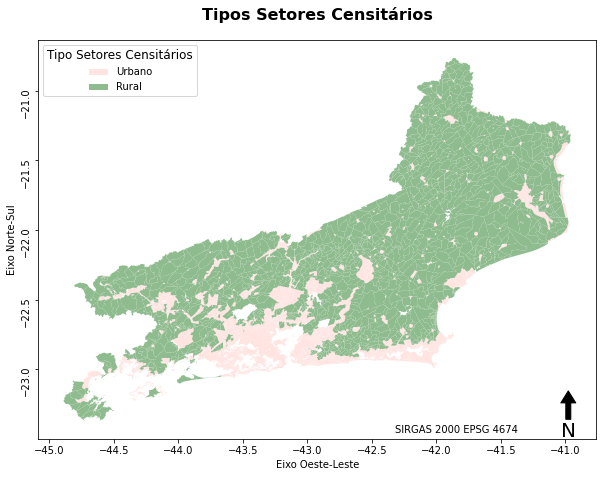

In [ ]:
# Importar um módulo específico da biblioteca matplotlib
from matplotlib import legend
from matplotlib.patches import Patch

# Definir uma figura e um eixo de plotagem
fig,eixo=plt.subplots(figsize=(10,10))

# Usar um loop para plotar cada linha utilizando as cores definidas em nosso dicionário
for key in Paleta_Setores:
    # Criar uma variavel "data" e atribuir cada registro/linha do gdf de acordo com o atributo "TIPO"
    data=rj_setores_domic_renda_2010[rj_setores_domic_renda_2010.TIPO==key]
    # Use o o dicionário para obter a cor correspondente
    cor = Paleta_Setores[key]
    # Plote cada linha com a cor especificada pelo dicionário
    data.plot(ax=eixo, color=cor, linewidth=1.3, label=key, legend=True)

# Adicionando título
plt.title("Tipos Setores Censitários", fontdict={'fontsize': 16,'fontweight' : 'bold'}, pad=20)


legend_elements = [Patch(facecolor='#FFE4E1', edgecolor='white', label='Urbano'), Patch(facecolor='#8FBC8F', edgecolor='white', label='Rural')]

# Ajustando a legenda para o eixo original
eixo.legend(handles=legend_elements, loc='upper left', frameon=True, title='Tipo Setores Censitários', title_fontsize=12)

# Definir o estilo dos rótulos dos eixos como "plain" para evitar que os valores sejam representados como notação científica
plt.ticklabel_format(style='plain')

# Rotacionar os rótulos 90°
plt.yticks(rotation=90)

# Nomear os eixos X e Y
eixo.set_ylabel('Eixo Norte-Sul') # Configurar o label do eixo y
eixo.set_xlabel('Eixo Oeste-Leste') # Configurar o label do eixo X

# Adicionar seta de norte
x, y, arrow_length = 0.95, 0.12, 0.1
eixo.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=eixo.transAxes)

# Adiconar  texto do Sistema de Coordenadas
eixo.annotate('SIRGAS 2000 EPSG 4674', xy=(0.75, 0.01),
              ha='center', va='bottom', fontsize=10,
              xycoords=eixo.transAxes)

# Salvando a figura com 300 dpi de resolução
outfp=r'/content/drive/MyDrive/09_DATASETS/0_Resultados/MapaSetoresCensitarios.png'
plt.savefig(outfp,dpi=300)